In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [2]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


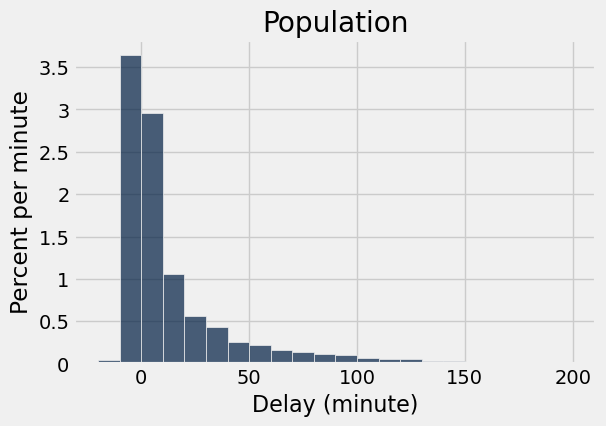

In [3]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population')
plots.show();

Population median:

In [4]:
np.median(united.column('Delay'))

2.0

### Law of Large Numbers 

#### Part 1: Watch how the empirical distribution of delay times changes with the changing sample size.

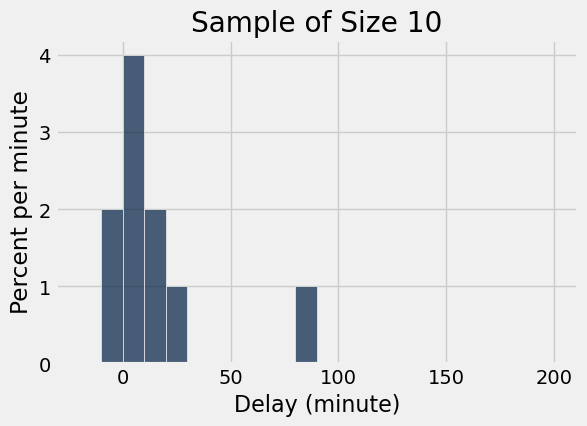

In [10]:
sample_10 = united.sample(10)
sample_10.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 10')
plots.show();

In [13]:
def empirical_distribution(sample_size):
    united.sample(sample_size).hist('Delay', bins = delay_bins, unit = 'minute')
    plots.title('Sample of Size ' + str(sample_size))
    plots.show();

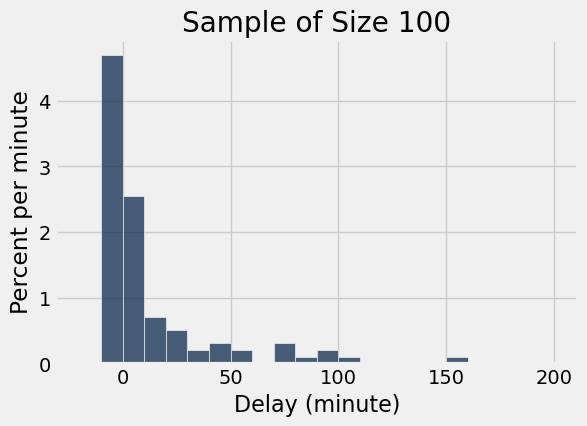

In [22]:
empirical_distribution(100)

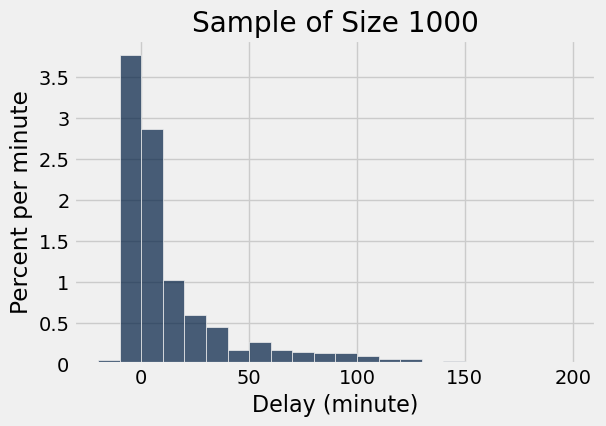

In [19]:
empirical_distribution(1000)

#### Part 2: Watch how the empirical distribution *of the statistic* changes with the changing sample size.

In [23]:
def observed_sample_median(sample_size):
    return np.median(united.sample(sample_size).column('Delay'))

In [24]:
def observed_sample_median_distribution(repetition_size, sample_size):

    observed_sample_medians = make_array()

    for rep in np.arange(repetition_size):
        new_median = observed_sample_median(sample_size)
        observed_sample_medians = np.append(observed_sample_medians, new_median)

    return observed_sample_medians

In [25]:
size_10 = observed_sample_median_distribution(1000,10)
size_100 = observed_sample_median_distribution(1000,100)
size_1000 = observed_sample_median_distribution(1000,1000)

In [26]:
sample_median_table = Table().with_columns('Size 10', size_10,
                                           'Size 100', size_100,
                                           'Size 1000', size_1000)

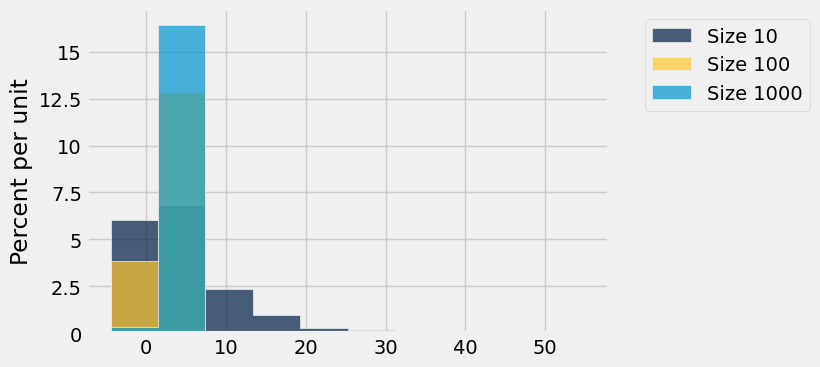

In [30]:
sample_median_table.hist()
plots.show()

______

## New material

### The case of Robert Swain

In [31]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [33]:
sample_proportions(100, population_proportions)

array([ 0.26,  0.74])

In [34]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [35]:
panel_proportion()

0.28

In [36]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [37]:
panels

array([ 23.,  25.,  28., ...,  23.,  27.,  30.])

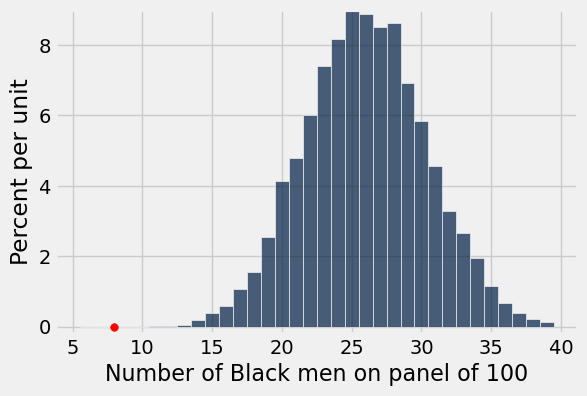

In [40]:
Table().with_column(
    'Number of Black men on panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30)
plots.show();

_____

### Mendel's pea plant model

In [41]:
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [42]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.77502691,  0.22497309])

In [44]:
def purple_flowers():
    return abs(sample_proportions(929, predicted_proportions).item(0) - 0.75)

In [45]:
purple_flowers()

0.016415500538213168

In [46]:
purples_differences = make_array()

for i in np.arange(10000):
    new_purple_difference = purple_flowers()
    purples_differences = np.append(purples_differences, new_purple_difference)

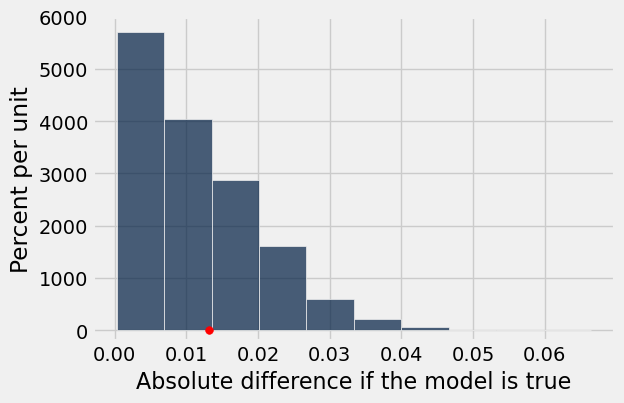

In [47]:
Table().with_column('Absolute difference if the model is true', purples_differences).hist()

# Plotting details; ignore this code
plots.ylim(-0.02*100, 0.6*100)
plots.scatter(abs(observed_purples -0.75), 0, color='red', s=30)
plots.show();